In [1]:
%load_ext autoreload
%autoreload 2

In [23]:
from diffusion import GaussianDiffusion
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import torchvision.transforms.v2 as v2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import torch

In [24]:
path = "./data"
dataset = CIFAR10(root=path, train=True, download=True, transform=v2.Compose([
    v2.ToTensor()
]))

dataloader = DataLoader(dataset, batch_size=1)

/home/ubuntu/.cache/pypoetry/virtualenvs/ddpm-NolEjOLK-py3.10/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


Files already downloaded and verified


In [25]:
def display_image(img):
    """
    batch: (C, H, W)
    """
    figure(figsize=(1, 1))
    img = img.permute((1, 2, 0))
    plt.imshow(img)

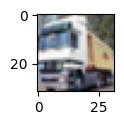

In [133]:
i = 1
img = dataset[i][0]

display_image(img)

In [75]:
beta_start = 0.0001
beta_end = 0.02
T = 1000

In [127]:
diffusion = GaussianDiffusion(
    beta_start=beta_start,
    beta_end=beta_end,
    timesteps=T
)

In [128]:
batch = img.unsqueeze(0).repeat(repeats=(2, 1, 1, 1))
batch.shape

torch.Size([2, 3, 32, 32])

In [129]:
sample = diffusion.q_sample(batch, t=100)
sample.shape

torch.Size([2, 3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


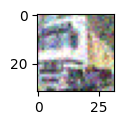

In [155]:
display_image(sample[0].squeeze(0))

In [190]:
x_t = torch.randn((1, 3, 32, 32))
x_0 = img

images = [x_t]

for t in range(1000, 1, -1):
    eps = torch.randn((1, 3, 32, 32))
    mean, var = diffusion.q_posterior_mean_var(x_t, x_0, t)
    x_t = mean + (var ** 0.5) * eps
    images.append(x_t)

In [191]:
images

[tensor([[[[ 1.0280, -0.4974, -2.4530,  ...,  1.4899, -0.9481,  1.0397],
           [-0.1121, -1.8146,  0.4805,  ..., -0.6012,  1.8907,  0.3823],
           [ 1.7167,  1.5457, -0.3608,  ..., -1.8366, -0.7028,  0.7115],
           ...,
           [-0.3187,  0.2162,  1.0662,  ..., -1.2451,  1.1534,  1.0306],
           [-0.8172, -0.2627,  0.7797,  ...,  0.4684,  0.1916,  0.1992],
           [-0.5562, -0.4783,  0.7860,  ..., -0.8807,  1.3549, -0.1836]],
 
          [[ 1.0596, -1.4518,  0.5068,  ...,  0.1051, -0.5638,  0.4056],
           [ 0.7343, -0.1939, -0.7585,  ..., -0.3022, -0.8596, -0.6545],
           [ 0.3114, -0.2080, -0.1031,  ..., -0.3962,  0.7649, -1.2934],
           ...,
           [-1.4783, -0.3150,  0.2478,  ..., -0.7385,  1.3336, -0.2949],
           [ 0.4678, -2.8448,  1.7313,  ...,  0.1810,  0.1234,  1.1046],
           [-1.2321, -1.3163,  0.1593,  ...,  1.2124,  0.6101, -0.1095]],
 
          [[ 0.0799, -1.1326,  1.6541,  ..., -0.9579,  0.6884,  1.7021],
           [ 

In [158]:
import imageio
import numpy as np

with imageio.get_writer('output_video.mp4', fps=1) as video:
    for tensor in images:
        # Remove the batch dimension and transpose the tensor to have (H, W, C) shape
        image = tensor.squeeze(0).permute(1, 2, 0).numpy()

        # image = (image - image.min()) / image.max()

        # Convert the image to uint8
        image = (image * 255).astype(np.uint8)
        video.append_data(image)

# print(images[-1].max())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


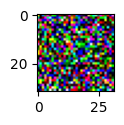

In [192]:
display_image(images[0].squeeze(0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


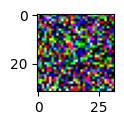

In [193]:
display_image(images[1].squeeze(0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


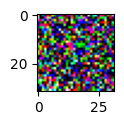

In [194]:
display_image(images[10].squeeze(0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


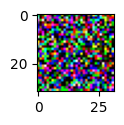

In [195]:
display_image(images[100].squeeze(0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


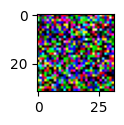

In [196]:
display_image(images[250].squeeze(0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


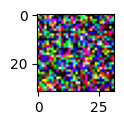

In [197]:
display_image(images[500].squeeze(0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


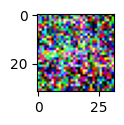

In [198]:
display_image(images[750].squeeze(0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


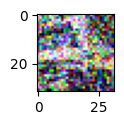

In [199]:
display_image(images[900].squeeze(0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


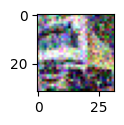

In [201]:
display_image(images[950].squeeze(0))

In [25]:
from unet import Swish, Upsample, Downsample, ResNetBlock, UNet
import torch

In [3]:
swish = Swish().to("cuda")
swish

Swish()

In [4]:
a = torch.tensor([1.0, 1], requires_grad=True).to("cuda")
a

tensor([1., 1.], device='cuda:0', grad_fn=<ToCopyBackward0>)

In [5]:
swish(a).sum().backward()

In [6]:
upsample = Upsample(32, with_conv=True)

In [7]:
x = torch.zeros((1, 32, 32, 32))

In [8]:
upsample(x).shape

torch.Size([1, 32, 64, 64])

In [9]:
downsample = Downsample(32, with_conv=True)

In [10]:
x = torch.zeros((1, 32, 16, 16))

In [11]:
downsample(x).shape

torch.Size([1, 32, 8, 8])

In [12]:
t = torch.ones((1, 128))
x = torch.zeros((1, 32, 16, 16))

In [23]:
resnet_block = ResNetBlock(32, 64, 128)

In [24]:
resnet_block(x, t).shape

torch.Size([1, 64, 16, 16]) torch.Size([1, 64, 16, 16])


torch.Size([1, 64, 16, 16])

In [19]:
a = torch.zeros((1, 2))
a.shape

a[:, :, None, None].shape

torch.Size([1, 2, 1, 1])

In [34]:
unet = UNet(3, 64, 1, num_res_blocks=2, attention_resolutions=(2))

In [35]:
x = torch.zeros((1, 3, 32, 32))
t = torch.zeros((1))

In [36]:
unet(x, t)